# What is a brain tumor?

#Brain Tumor MRI

A brain tumor is a collection, or mass, of abnormal cells in your brain. Your skull, which encloses your brain, is very rigid. Any growth inside such a restricted space can cause problems. Brain tumors can be cancerous (malignant) or noncancerous (benign). When benign or malignant tumors grow, they can cause the pressure inside your skull to increase. This can cause brain damage, and it can be life-threatening.

# The importance of the subject

Early detection and classification of brain tumors is an important research domain in the field of medical imaging and accordingly helps in selecting the most convenient treatment method to save patients life therefore

# About Dataset


This dataset is a combination of the following three datasets :

figshare
SARTAJ dataset
Br35H

This dataset contains 7023 images of human brain MRI images which are classified into 4 classes: glioma - meningioma - no tumor and pituitary.

no tumor class images were taken from the Br35H dataset.
Dataset link :https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
#  download dataset from kaggle

!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset


Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0


In [3]:
!unzip brain-tumor-mri-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Training/glioma/Tr-gl_0712.jpg  
  inflating: Training/glioma/Tr-gl_0713.jpg  
  inflating: Training/glioma/Tr-gl_0714.jpg  
  inflating: Training/glioma/Tr-gl_0715.jpg  
  inflating: Training/glioma/Tr-gl_0716.jpg  
  inflating: Training/glioma/Tr-gl_0717.jpg  
  inflating: Training/glioma/Tr-gl_0718.jpg  
  inflating: Training/glioma/Tr-gl_0719.jpg  
  inflating: Training/glioma/Tr-gl_0720.jpg  
  inflating: Training/glioma/Tr-gl_0721.jpg  
  inflating: Training/glioma/Tr-gl_0722.jpg  
  inflating: Training/glioma/Tr-gl_0723.jpg  
  inflating: Training/glioma/Tr-gl_0724.jpg  
  inflating: Training/glioma/Tr-gl_0725.jpg  
  inflating: Training/glioma/Tr-gl_0726.jpg  
  inflating: Training/glioma/Tr-gl_0727.jpg  
  inflating: Training/glioma/Tr-gl_0728.jpg  
  inflating: Training/glioma/Tr-gl_0729.jpg  
  inflating: Training/glioma/Tr-gl_0730.jpg  
  inflating: Training/glioma/Tr-gl_0731.jpg  
  inflating: Training/glioma/

#Import libraries


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.initializers import HeUniform, GlorotUniform

import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import os
import random

from PIL import Image
import math
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import GlobalAveragePooling2D, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import losses
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras import datasets

# Function to get dimensions of the image

In [5]:
# Function to get image dimensions
def get_image_dimensions(image_path):
    try:
        with Image.open(image_path) as img:
            width, height = img.size
            return width, height
    except (FileNotFoundError, OSError):
        return None, None  # Handle cases where the file is not found or corrupted

# Function for making a DataFrame

In [6]:
#  function for making adata frame

import pandas as pd
# Function to create a DataFrame from image data
def create_image_dataframe(data_dir):
    image_paths = []
    labels = []
    widths = []
    heights = []

    for class_name in os.listdir(data_dir):
        class_dir = os.path.join(data_dir, class_name)
        if os.path.isdir(class_dir):
            for image_name in os.listdir(class_dir):
                image_path = os.path.join(class_dir, image_name)
                image_paths.append(image_path)
                labels.append(class_name)
                width, height = get_image_dimensions(image_path)
                widths.append(width)
                heights.append(height)

    df = pd.DataFrame({
        'image_path': image_paths,
        'label': labels,
        'width': widths,
        'height': heights
    })
    return df


# Create Train DataFramr and Test DataFrame

In [7]:
train_df = create_image_dataframe('/content/Training')
test_df = create_image_dataframe('/content/Testing')

In [8]:
print(train_df.head())
print(test_df.head())

                                image_path   label  width  height
0  /content/Training/glioma/Tr-gl_0173.jpg  glioma    512     512
1  /content/Training/glioma/Tr-gl_1246.jpg  glioma    512     512
2  /content/Training/glioma/Tr-gl_0162.jpg  glioma    512     512
3  /content/Training/glioma/Tr-gl_0711.jpg  glioma    512     512
4  /content/Training/glioma/Tr-gl_1141.jpg  glioma    512     512
                                 image_path   label  width  height
0    /content/Testing/glioma/Te-gl_0078.jpg  glioma    512     512
1  /content/Testing/glioma/Te-glTr_0008.jpg  glioma    512     512
2    /content/Testing/glioma/Te-gl_0018.jpg  glioma    512     512
3    /content/Testing/glioma/Te-gl_0221.jpg  glioma    512     512
4    /content/Testing/glioma/Te-gl_0275.jpg  glioma    512     512


In [13]:
print(f"Train shape : {train_df.shape}")
print("-----------------------------")
print("-----------------------------")
print(f"Test shape :{test_df.shape}")

Train shape : (5712, 4)
-----------------------------
-----------------------------
Test shape :(1311, 4)


In [12]:
print(f"Train info :{train_df.info()}")
print("------------------------------")
print("-------------------------------")
print(f"Test info :{test_df.info()}")

print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5712 entries, 0 to 5711
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  5712 non-null   object
 1   label       5712 non-null   object
 2   width       5712 non-null   int64 
 3   height      5712 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 178.6+ KB
Train info :None
------------------------------
-------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311 entries, 0 to 1310
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  1311 non-null   object
 1   label       1311 non-null   object
 2   width       1311 non-null   int64 
 3   height      1311 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 41.1+ KB
Test info :None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311 entries, 0 to 1310
Data columns (total 4 columns):
 # 

# Functions for EDA

In [14]:
#  functions for class distribution make it colorful

import matplotlib.pyplot as plt
import seaborn as sns

def plot_class_distribution(df, title="Class Distribution"):
    print(df['label'].value_counts())
    plt.figure(figsize=(10, 6))  # Increased figure size for better visibility
    sns.countplot(x='label', data=df, palette="viridis") # Use a colorful palette
    plt.title(title, fontsize=16) # Increased title font size
    plt.xlabel("Class", fontsize=12) # Increased x-axis label font size
    plt.ylabel("Count", fontsize=12) # Increased y-axis label font size
    plt.xticks(rotation=45, ha='right', fontsize=10) # Rotated x-axis labels
    plt.tight_layout()  # Adjust layout to prevent labels from overlapping
    plt.show()

def image_dimension_distribution(df,hight_title,width_title):

   print(train_df.describe())

   plt.figure(figsize=(12, 5))
   plt.subplot(1, 2, 1)
   sns.histplot(train_df['width'], kde=True)
   plt.title(width_title)

   plt.subplot(1, 2, 2)
   sns.histplot(train_df['height'], kde=True)
   plt.title(hight_title)

   plt.tight_layout()
   plt.show()

# Function to display images in subplots
def plot_images_by_category(df, num_images_per_category=3):
    categories = df['label'].unique()
    num_categories = len(categories)

    # Calculate the optimal grid dimensions
    num_cols = min(num_categories, 5)  # Adjust as needed
    num_rows = math.ceil(num_categories / num_cols)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3 * num_rows))  # Adjust figure size

    for i, category in enumerate(categories):
        row = i // num_cols
        col = i % num_cols
        ax = axes[row, col] if num_rows > 1 else axes[col]

        category_images = df[df['label'] == category].head(num_images_per_category)
        for j, (index, row) in enumerate(category_images.iterrows()):
            try:
                image = Image.open(row['image_path'])
                ax.imshow(image)
                ax.set_title(f"{category} ({j+1})")
                ax.axis('off')
            except FileNotFoundError:
                print(f"File not found: {row['image_path']}")
                ax.set_title(f"Error: File not found")
                ax.axis('off')

        if num_categories < num_cols * num_rows:  # Hide unused subplots
          for k in range(i + 1, num_rows * num_cols):
            row = k // num_cols
            col = k % num_cols
            ax = axes[row, col] if num_rows > 1 else axes[col]
            ax.axis('off')

    plt.tight_layout()
    plt.show()





#  EDA for  Train_df


label
notumor       1595
pituitary     1457
meningioma    1339
glioma        1321
Name: count, dtype: int64


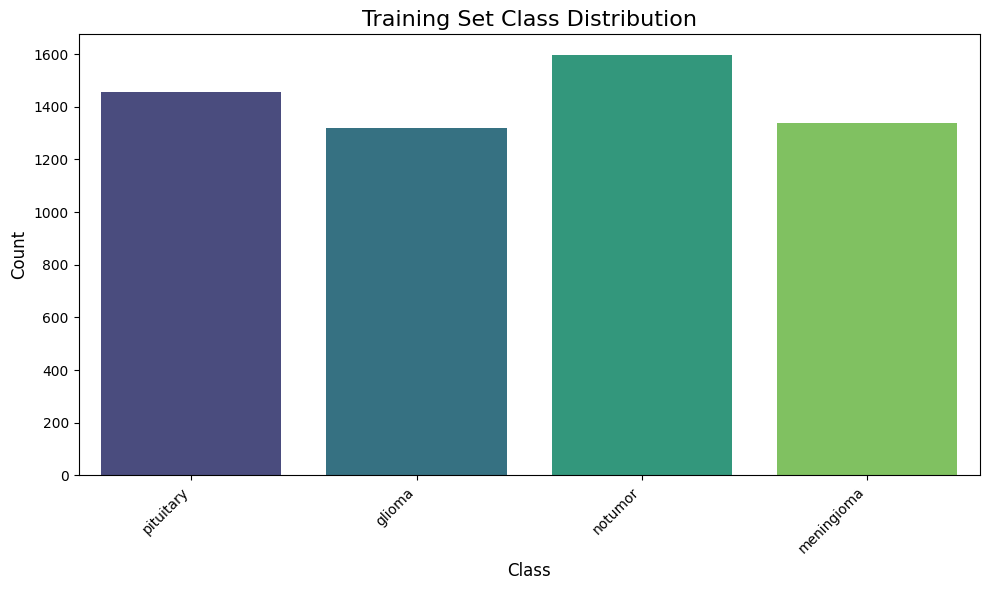

In [ ]:
#  EDA for  Train_df
# 1. Class Distribution in train_df
plot_class_distribution(train_df, "Training Set Class Distribution")



This dataset has a weak imbalance and can be considered relatively balanced.

# 2. Image Dimensions Analysis in train_df

             width       height
count  5712.000000  5712.000000
mean    451.563200   453.883754
std     131.004291   124.779164
min     150.000000   168.000000
25%     441.000000   442.000000
50%     512.000000   512.000000
75%     512.000000   512.000000
max    1920.000000  1446.000000


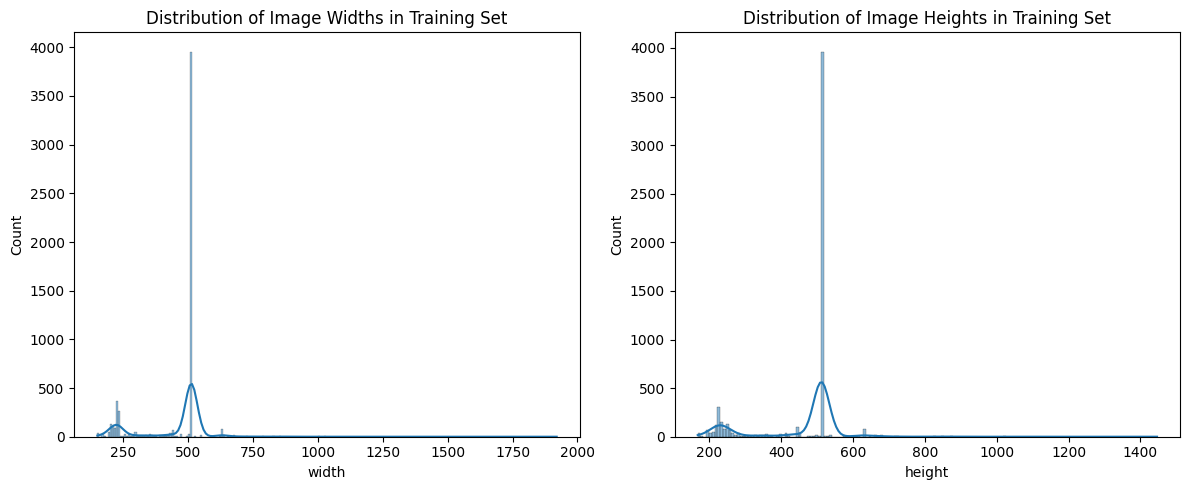

In [ ]:
# 2. Image Dimensions Analysis in train_df
image_dimension_distribution(train_df,'Distribution of Image Heights in Training Set','Distribution of Image Widths in Training Set')


**Most of images has dimension (500*500)**

#  Visually inspect sample images per class.

 This can help identify potential issues with image quality (blur, artifacts, etc.)



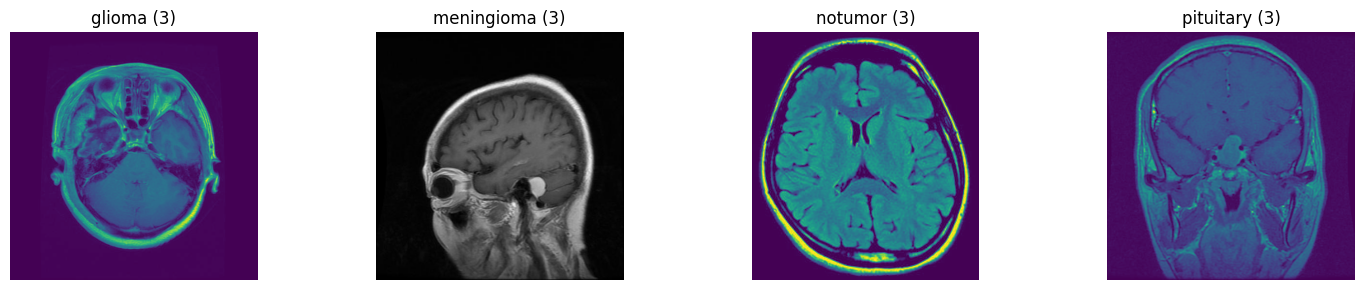

In [15]:
#  plot images from train_df that include all categort in subplot
# Call the function to plot images
plot_images_by_category(train_df)




# EDA for Test Dataset

label
notumor       405
meningioma    306
glioma        300
pituitary     300
Name: count, dtype: int64


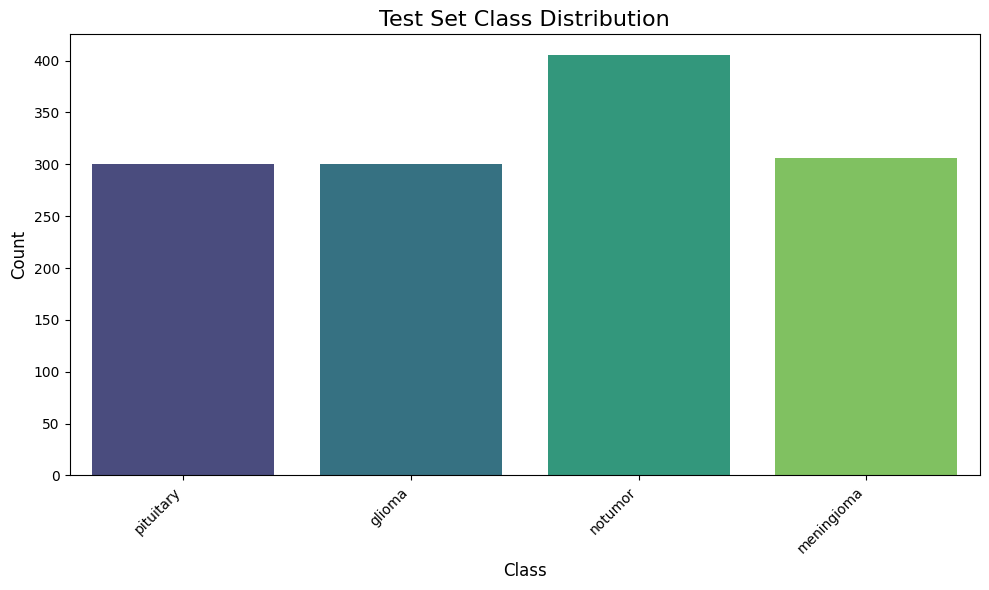

             width       height
count  5712.000000  5712.000000
mean    451.563200   453.883754
std     131.004291   124.779164
min     150.000000   168.000000
25%     441.000000   442.000000
50%     512.000000   512.000000
75%     512.000000   512.000000
max    1920.000000  1446.000000


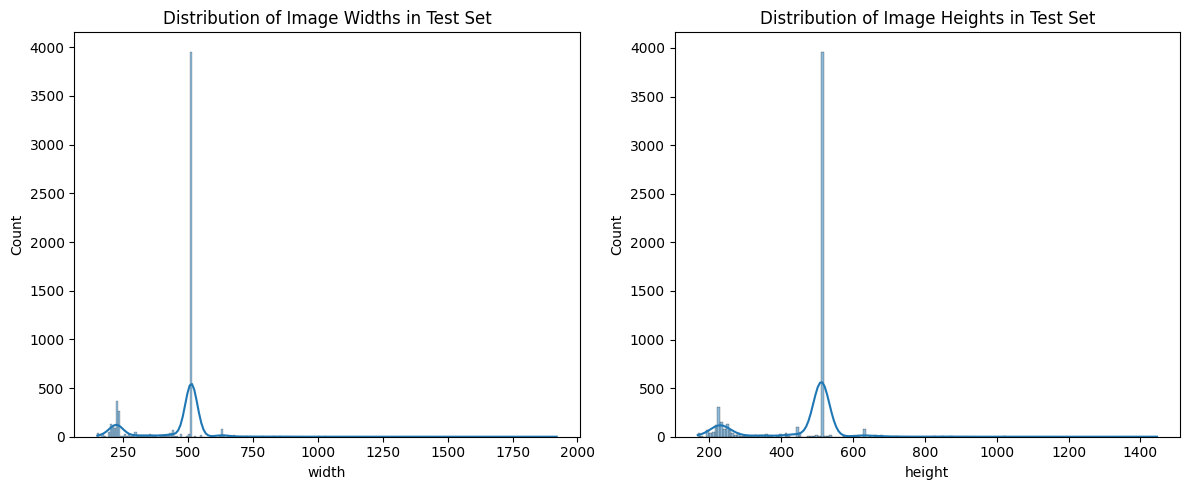

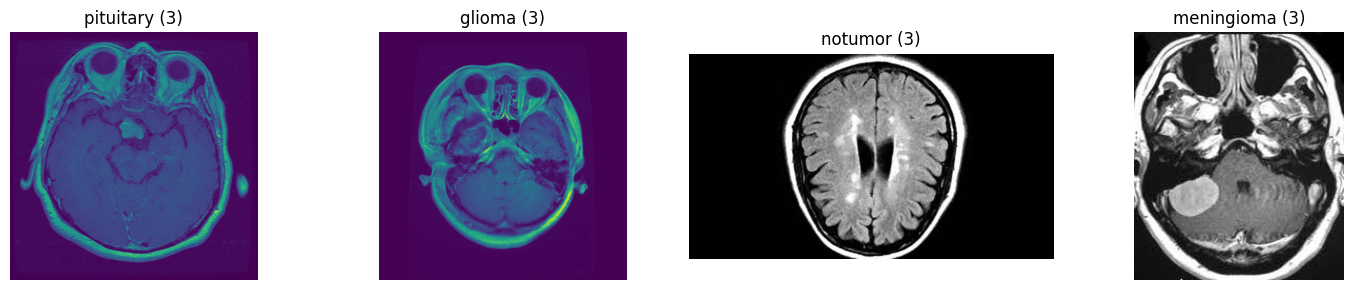

In [ ]:
# call functions for EDA
plot_class_distribution(test_df, "Test Set Class Distribution")
image_dimension_distribution(test_df,
                             'Distribution of Image Heights in Test Set',
                             'Distribution of Image Widths in Test Set')
plot_images_by_category(test_df)

# Save DataFrames

In [18]:
#  save train_df and test_df to use them inmodeling

train_df.to_csv('brain_tumor_train_df.csv', index=False)
test_df.to_csv('brain_tumor_test_df.csv', index=False)
